*Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

*Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

Могла ли модель переобучиться? Почему?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
z = np.linspace(-10, 10, 101)

In [8]:
probabilities = sigmoid(z)

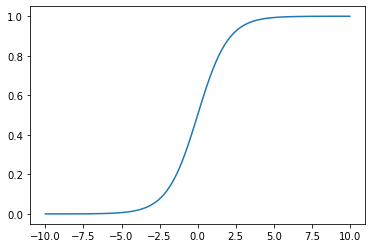

In [9]:
plt.plot(z, probabilities)
plt.show()

In [150]:
def eval_model(X, y, iterations, eta):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [151]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785956513536955
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657984045140992
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.15311110978492
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.140535127214629
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280717943721248
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157224272733977
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.1034883215653966
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913707539585298
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793709838952013
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674902554374908


1) Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [152]:
def calc_logloss(y, y_pred, eps=1e-8):
    err = - np.mean(y * np.log(y_pred + eps) + (1.0 - y) * np.log(1.0 - y_pred + eps))
    return err

2) Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным

In [153]:
np.random.seed(42)

def eval_model_1(X, y, iterations, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
    return [eta, iterations, W, err]

In [154]:
a = 1e-1, 1e-09, 1e-07, 1e-05, 1e-01, 1e+00, 1e+01
b = 5000, 10000, 20000, 40000, 60000, 80000, 100000

In [155]:
results = []
for a1 in a:
    for b1 in b:
        results.append(eval_model_1(X_st, y, b1, a1))

In [156]:
min_test = [None, None, None, np.inf]
for result in results:
    if result[3] < min_test[3]:
        min_test = result

In [157]:
min_test

[10.0,
 100000,
 array([-222.97321742,  -15.72575421,  -66.06334631,  170.61073355]),
 0.006735607004321355]

In [158]:
W = eval_model(X_st, y, iterations=min_test[1], eta=min_test[0])

0 [ -3.29715467 -14.6470242    0.37388435  -4.13843283] 1.1785956513536955
10000 [-102.03004454   -8.24685704  -29.33695673   80.06488301] 0.04101280557323571
20000 [-130.9201972   -10.02007802  -38.12208873  101.66697094] 0.02702407878304906
30000 [-151.56963877  -11.29395108  -44.39541073  117.12034145] 0.01991267183387061
40000 [-167.51884244  -12.28083327  -49.23808788  129.0622051 ] 0.015679948737315354
50000 [-180.46437048  -13.08339146  -53.16735496  138.75818011] 0.012894768905874227
60000 [-191.3365185   -13.75829576  -56.4664939   146.90301529] 0.010931691560468467
70000 [-200.69627752  -14.33987081  -59.30619316  153.91596698] 0.00947742299244642
80000 [-208.90643304  -14.85038347  -61.7967713   160.06830334] 0.008358778499767806
90000 [-216.21444013  -15.30505739  -64.01344401  165.54512735] 0.007472641734229024


3) Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [159]:
def calc_pred_proba(W, X):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

y_proba = calc_pred_proba(W, X_st)
y_proba

array([3.32306840e-02, 5.15261077e-14, 1.00000000e+00, 2.11295083e-35,
       9.98262074e-01, 4.21445010e-13, 1.00000000e+00, 3.20928413e-04,
       9.68812815e-01, 1.00000000e+00])

4) Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [160]:
def calc_pred(W, X, treshhold=0.5):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    y_pred = list(map(lambda x: 1 if x > treshhold else 0, y_pred_proba))
    return y_pred

y_pred = calc_pred(W, X_st)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

5) Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [161]:
def accuracy(y, predection):
    return sum(y == y_pred) / len(y)

In [162]:
accuracy(y , y_pred)

1.0

In [163]:
def err_matrix(y, predection):
    matrix = np.zeros((2, 2))
    for i, value in enumerate(y):
        if value == 1:
            if predection[i] == value:
                matrix[0][0] += 1
            else:
                 matrix[0][1] += 1
        elif value == 0:
            if predection[i] == value:
                matrix[1][1] += 1
            else:
                 matrix[1][0] += 1
    return matrix

In [164]:
err_matrix = err_matrix(y , y_pred)
err_matrix

array([[5., 0.],
       [0., 5.]])

In [165]:
def precision(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])

In [166]:
precision(err_matrix)

1.0

In [167]:
def recall(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])

In [168]:
recall(err_matrix)

1.0

In [169]:
def F1(err_matrix):
    return 2 * precision(err_matrix) * recall(err_matrix) / (precision(err_matrix) + recall(err_matrix))

In [170]:
F1(err_matrix)

1.0

6) Могла ли модель переобучиться? Почему?

Переобучена. минамальный log loss привел к переобучению